# RECESSION ANALYSIS USING GDP

-Recession is calculated and analyzed according to the growth in GDP, the growth in the unemployment rate, and the growth in consumer spending rate. But the most common way of measuring recession is by analyzing the monthly GDP growth data.

-A recession is an economic situation that arrives when the circulation of money in the economy is low for two consecutive quarters. When the circulation of money is low, it means people are not spending money in the market. When people don’t spend money, businesses face losses.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [19]:
data= pd.read_csv("UK_monthly_gdp.csv")
data.head()

,Time Period,GDP Growth
0,/01/2020,0.3
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
4,/05/2020,3.2


# GDP GORWTH OVER TIME

In [20]:
fig = go.Figure(data=go.Heatmap(
                   z=[data['GDP Growth']],
                   x=data.index,
                   y=['GDP Growth'],
                   colorscale='Viridis'))

fig.update_layout(title='GDP Growth over Time',
                  xaxis_title='Time Period',
                  yaxis_title='')

fig.show()

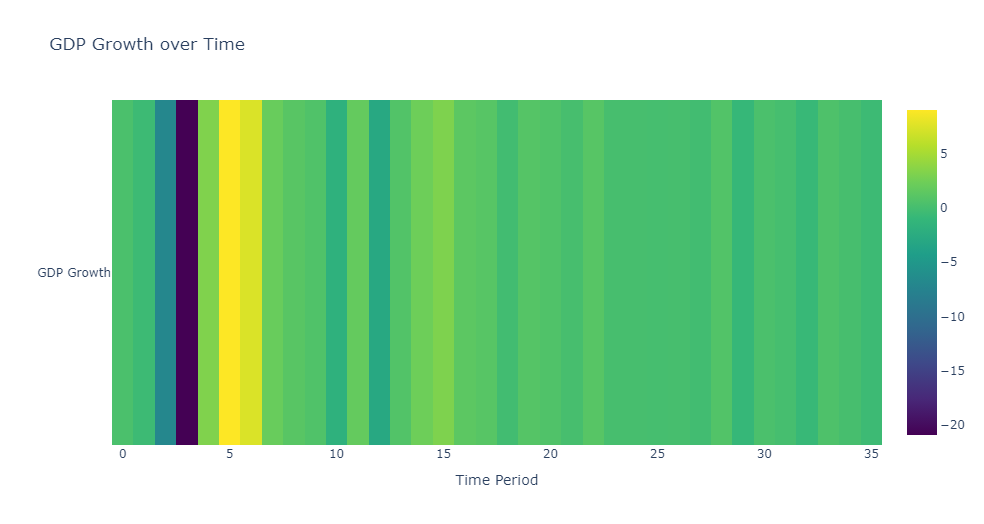

- As a recession means the decline in the circulation of money for two consecutive quarters, convert our monthly data into quarterly data to analyze the recession.

In [21]:
data["Time Period"] = pd.to_datetime(data["Time Period"], format='/%m/%Y')
data.set_index("Time Period", inplace=True)
quarterly_data = data.resample("Q").mean()
quarterly_data.head()

,GDP Growth
Time Period,
2020-03-31,-2.400000
2020-06-30,-2.900000
2020-09-30,3.500000
2020-12-31,0.200000
2021-03-31,0.033333


In [23]:
quarterly_data["recession"] = ((quaterly_data["GDP Growth"] < 0) & (quaterly_data["GDP Growth"].shift(1) <0))
quarterly_data["recession"].fillna(False, inplace=True)
quarterly_data.head()

,GDP Growth,recession
Time Period,,
2020-03-31,-2.400000,False
2020-06-30,-2.900000,True
2020-09-30,3.500000,False
2020-12-31,0.200000,False
2021-03-31,0.033333,False


In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=quarterly_data.index, 
                         y=quarterly_data['GDP Growth'], 
                         name='GDP Growth', 
                         line=dict(color='green', width=2)))
fig.add_trace(go.Scatter(x=quarterly_data[quarterly_data['recession']].index, 
                         y=quarterly_data[quarterly_data['recession']]['GDP Growth'], 
                         name='Recession', line=dict(color='red', width=2)))

fig.update_layout(title='GDP Growth and Recession over Time (Quarterly Data)',
                  xaxis_title='Time Period',
                  yaxis_title='GDP Growth')

fig.show()

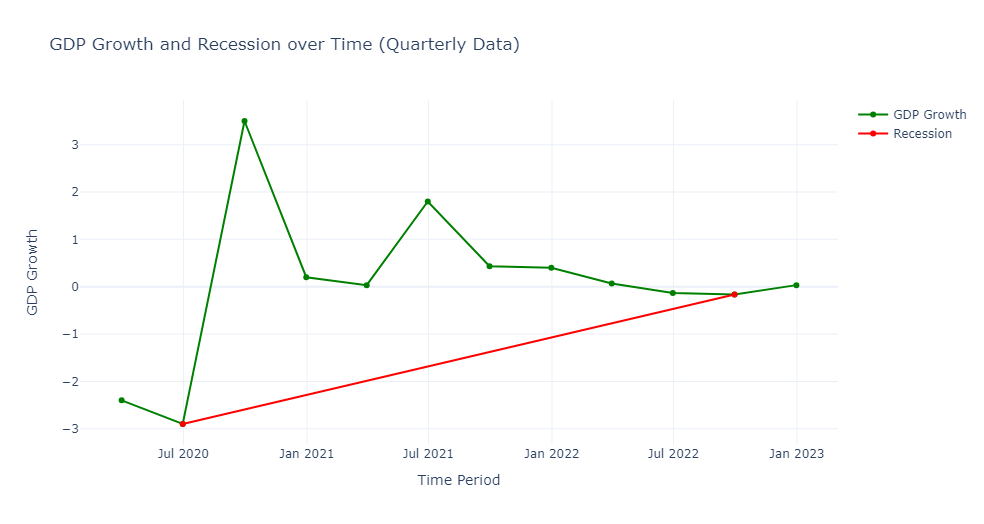

- The red line shows the periods of negative GDP growth (considered recessions), and the green line shows the overall trend in GDP growth over time.

##  SEVERITY OF RECESSION
- The severity of a recession refers to the extent to which the economy contracts during a recession. A severe recession involves a deeper and more prolonged decline in economic activity, resulting in negative effects on employment, incomes and other economic indicators.

In [28]:
quarterly_data["recession_start"] = quarterly_data["recession"].ne(quarterly_data["recession"].shift()).cumsum()
recession_period = quarterly_data.groupby("recession_start")
recession_duration = recession_period.size()
recession_severity = recession_period["GDP Growth"].sum()

In [29]:
fig = go.Figure()
fig.add_trace(go.Bar(x=recession_duration.index, y=recession_duration,
                     name='Recession Duration'))
fig.add_trace(go.Bar(x=recession_severity.index, y=recession_severity,
                     name='Recession Severity'))

fig.update_layout(title='Duration and Severity of Recession',
                  xaxis_title='Recession Periods',
                  yaxis_title='Duration/Severity')

fig.show()

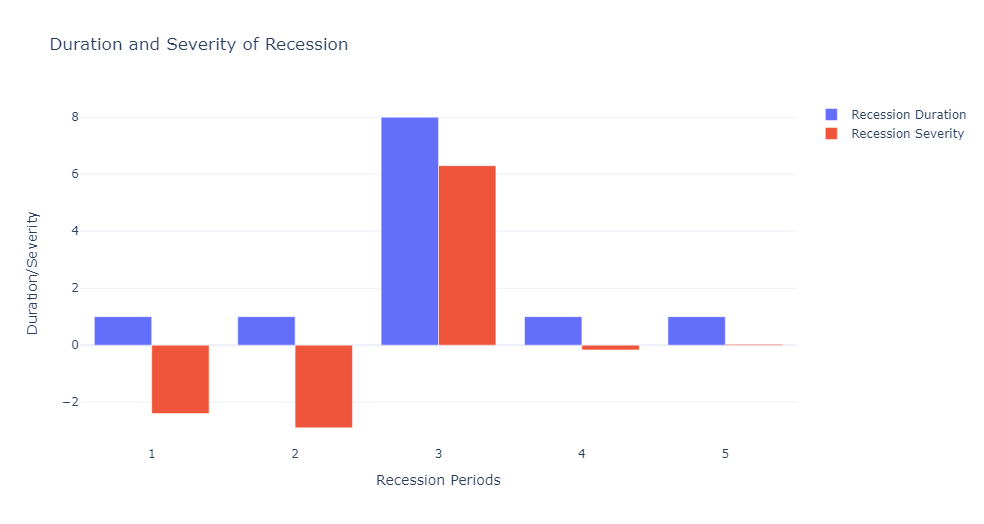

# SUMMARY

- A recession is an economic situation that arrives when the circulation of money in the economy is low for two consecutive quarters. Recession is calculated and analyzed according to the growth in GDP, the growth in the unemployment rate, and the growth in consumer spending rate.